
#  TMDb movie dataset analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The Movie Database (TMDb) is an open source data base on movies and TV series. The use of its database is free and accessible to any user. With this facility, we will use this open data to analyze data from multiple movies and use data visualization for a more complete analysis about correlations and possibles trends of popularity, profitability, genres, and various other insights.
>
> The link to download the TMDb dataset you can find [here](https://s3.amazonaws.com/video.udacity-data.com/topher/2018/July/5b57919a_data-set-options/data-set-options.pdf).


> An in-depth examination of the data raised several questions to be analyzed. Some of them are:
>> 1. Which movie had the highest revenue?
>> 2. Which movie had the lowest revenue?
>> 3. What is the most popular movie?
>> 4. What is the most profitable movie?
>> 5. What is the correlation between revenue and popularity?
>> 6. Which genres had the highest revenue?
>> 7. What is the correlation between popularity, budget, revenue and vote? 
>> 8. Was the movie with the biggest budget more profitable?
>> 9. Which was the most profitable production company?
>> 10. Which are the 3 most voted movies?
>> 11. What is the most popular genre?
>> 12. Which genre had the highest release per year?
>> 13. Which director has made the most movies?
>> 14. What is the relationship between runtime and popularity?
>> 15. what is the average runtime evolution per year?
>> 16. Does the length of films relate to revenue?
>> 17. Number of movies over the years increased?


In [1]:
# Import packages for this analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> Download the dataset, inspect data to understand the structure and see if have any changes or unused data to delete. We will be keeping only relevent data. There are no specifictions about the currency used in the dataset, we will assume that it is in US dollar.


### General Properties

In [2]:
# Load 'tmdb-movies.csv 'and read the CSV File using Pandas read_csv function 
# View dataset using head() function
df = pd.read_csv('tmdb-movies.csv')
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# view dimensions of dataset
df.shape

(10866, 21)

In [4]:
# check which columns have missing values with info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
# describe the dataset for more informations
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
# check for missing value count for each features in the dataset
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
# Check if there is any duplicates data in tmdb dataset
df.duplicated().sum()

1

### Data Cleaning 

> - Replace the missing data for '0';
> - Drop duplicate data;
> - Delete the columns (homepage, tagline, overview, imdb_id) that are not needed for this analysis; 
> - The genre and productions companies columns are separeted by'|', split the data to facilitate the future analysis.


In [8]:
# Replace all NaN elements with 0s
df.fillna(0, inplace=True)

In [9]:
# confirm changes
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [10]:
# drop duplicates rowls 
df.drop_duplicates(inplace=True)

In [11]:
# check number of duplicates to confirm the change made
df.duplicated().sum()

0

In [12]:
# drop columns that i wont use
df.drop(['homepage', 'tagline', 'overview', 'imdb_id'], axis=1, inplace=True)

# confirm changes
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [13]:
# Use the function 'split' to separate the string and create a list whith the genres
df.genres = df.genres.str.split(pat="|")
df.head(3)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [14]:
#Use the function 'expode' to create new rowls for the same movie but with separated genres
df = df.explode('genres')
df.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [15]:
# Use the function 'split' to separate the string and create a list whith the production companies
df.production_companies = df.production_companies.str.split(pat="|")
df.head(3)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,"[Universal Studios, Amblin Entertainment, Lege...",6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Adventure,"[Universal Studios, Amblin Entertainment, Lege...",6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Science Fiction,"[Universal Studios, Amblin Entertainment, Lege...",6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [16]:
#Use the function 'expode' to create new rowls for the same movie but with separated production companies
df = df.explode('production_companies')
df.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Amblin Entertainment,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Legendary Pictures,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Fuji Television Network,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Dentsu,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


<a id='eda'></a>
## Exploratory Data Analysis

> Once the data cleaning is carried out, we will use formulas, statistics and graphical analysis to answer the questions.

### Understanding the data distribution in the dataset

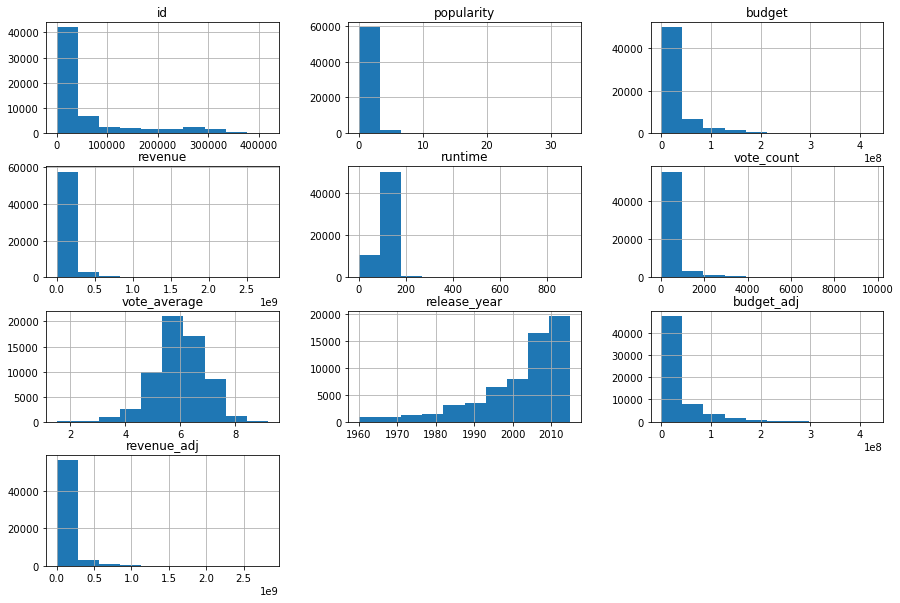

In [17]:
# Plot a histogram chart for each item in the dataset for better vizualization and understand of data distribution
df.hist(figsize=(15, 10));

In [18]:
# use 'mean()' function to find the mean of runtime
df.runtime.mean()

105.0842167063505

The mean films duration is 105.08 minutes.

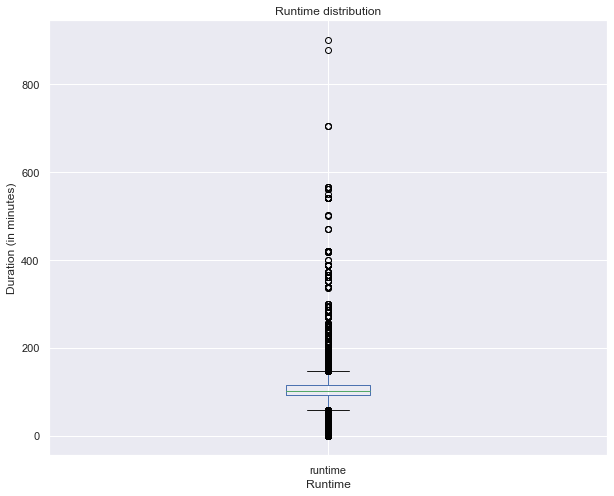

In [79]:
# plot a box chart of runtime to understand the distribution 
df['runtime'].plot(kind='box', figsize=(10,8))
# Set labels and title
plt.title("Runtime distribution")
plt.xlabel('Runtime')
plt.ylabel('Duration (in minutes)');

There is bigger duration concentration between 80 minutes and 160 minutes, and a few above 400 minutes.

In [20]:
# Use 'unique()' function to see all categorical variable in the genre column
df.genres.unique()

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'TV Movie', nan, 'Foreign'], dtype=object)

In [21]:
# Use 'nunique function to count how many diferent genres have in the dataset'
df.genres.nunique()

20

There is 20 diferent genres in this dataset

In [22]:
# Count all genre types to see the distributions of all genres types
df.genres.value_counts()

Drama              11108
Comedy              7852
Thriller            7352
Action              5866
Romance             3792
Horror              3637
Adventure           3489
Crime               3474
Science Fiction     2817
Family              2362
Fantasy             2101
Mystery             2042
Animation           1310
History              884
Music                803
Documentary          788
War                  718
Western              341
Foreign              303
TV Movie             255
Name: genres, dtype: int64

Text(0, 0.5, 'Quantity')

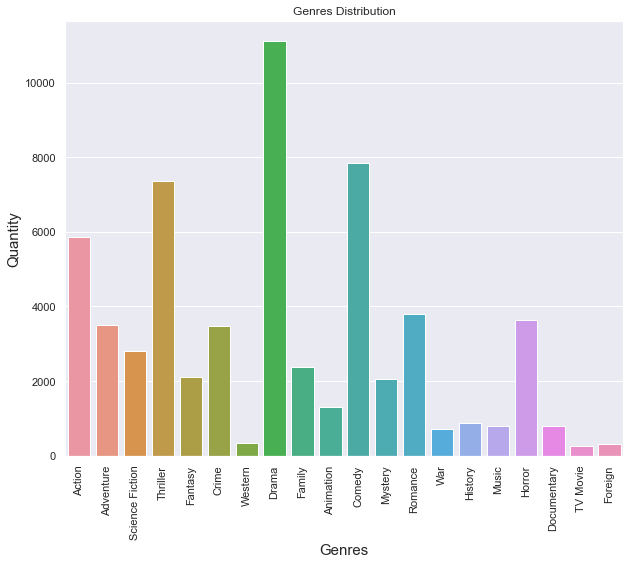

In [78]:
# Plot a bar chart to see the genre distribution
g = sns.countplot(data=df, x='genres')
sns.set(rc={'figure.figsize':(8,10)})
# Set title and labels
plt.xticks(rotation=90)  
g.set_title('Genres Distribution')
g.set_xlabel("Genres",fontsize=15)
g.set_ylabel("Quantity",fontsize=15)

The genre with the most number of movies is drama, followed by comedy and thriller.

In [24]:
# Use 'describe()' function to see the statistics of vote average
df.vote_average.describe()

count    61318.000000
mean         5.976959
std          0.877153
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

The mean of vote average is 5.97. The lowest vote is 0.87 and the highest vote is 9.2.

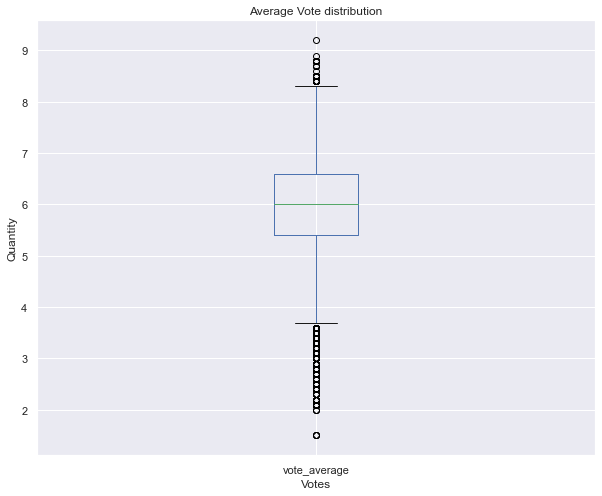

In [75]:
# Plot a box chart to understand the vote distribution
df['vote_average'].plot(kind='box',figsize=(10,8))
plt.title("Average Vote distribution")
plt.xlabel('Votes')
plt.ylabel('Quantity');

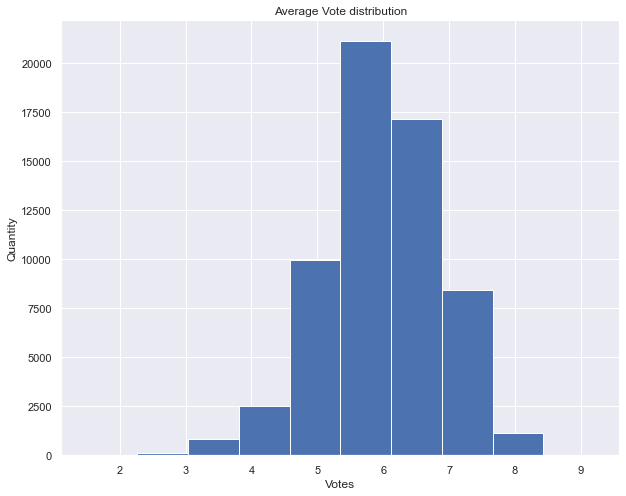

In [74]:
# Plot a bar chart to have another visual look in the vote distribution
df['vote_average'].hist(figsize=(10,8))
plt.title("Average Vote distribution")
plt.xlabel('Votes')
plt.ylabel('Quantity');

There is a higher concentration of vote average between 5 and 7 in the vote range.

## Questions

### 1. Which movie had the highest revenue?

In [27]:
# use the function 'nlargest' to find de the max value in the 'revenue' column
df.nlargest(1, 'revenue')

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Action,Ingenious Film Partners,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09


**Avatar** was the movie with the highest revenue. 
The movie was directed by James Cameron and he raised just over 2.7 billions dollars.

### 2. Which movie had the lowest revenue?

In [28]:
# use the function 'nsmallest' to find de the min value in the 'revenue' column
df.nsmallest(1, 'revenue')

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,2.93234,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,gambling|bodyguard|remake,92,Thriller,Current Entertainment,1/14/15,481,5.3,2015,2.759999e+07,0.0


**Wild Card** directed by Simon West was the movie with the lowest revenue.

### 3. What is the most popular movie?

In [29]:
# Use the same 'nlargest' function we previously used to find the highest value in the popularity column to filter the most popular movie
df.nlargest(1, 'popularity')

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


The most popular movie was **Jurassic World**. Directed by Colin Trevorrow, his movie received 32.985763 points of popularity in the TMDb dataset.

### 4. What is the most profitable movie?

In [30]:
# In order to find profitability,deduct the colum 'revenue' by the 'budget' column 
prof = df.revenue - df.budget
prof

0        1363528810
0        1363528810
0        1363528810
0        1363528810
0        1363528810
            ...    
10863             0
10863             0
10864             0
10864             0
10865        -19000
Length: 61318, dtype: int64

In [31]:
# use the function max() to find the highest value of profitability
prof.max()

2544505847

In [32]:
# use the function 'idxmax()' to find the index of highest profit movie.
prof.idxmax()

1386

In [33]:
# Locate the index of highest profit movie using 'df.loc[]'
df.loc[prof.idxmax()]

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Action,Ingenious Film Partners,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Action,Twentieth Century Fox Film Corporation,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Action,Dune Entertainment,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Action,Lightstorm Entertainment,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Adventure,Ingenious Film Partners,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Adventure,Twentieth Century Fox Film Corporation,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Adventure,Dune Entertainment,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Adventure,Lightstorm Entertainment,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Fantasy,Ingenious Film Partners,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Fantasy,Twentieth Century Fox Film Corporation,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09


The most profible movie is **Avatar** with more than 2.5B of profitability. Avatar is a adventure, action, fantasy and science fiction film directed by James Cameron.

### 5. What is the correlation between revenue and popularity?

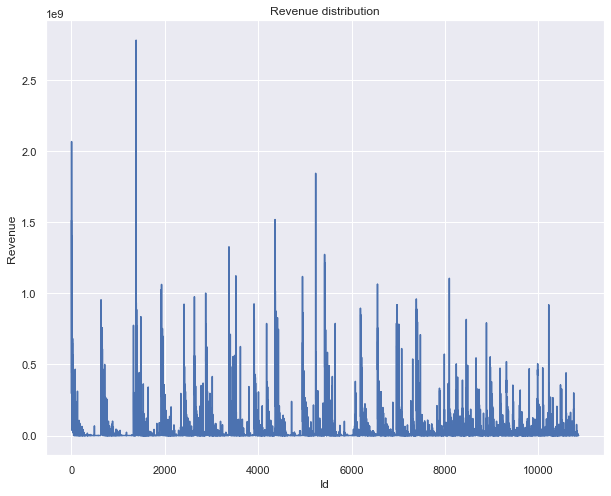

In [80]:
# Let`s have a quick look in the revenue distribution 
df.revenue.plot(figsize=(10,8))
plt.title("Revenue distribution")
plt.xlabel('Id')
plt.ylabel('Revenue');

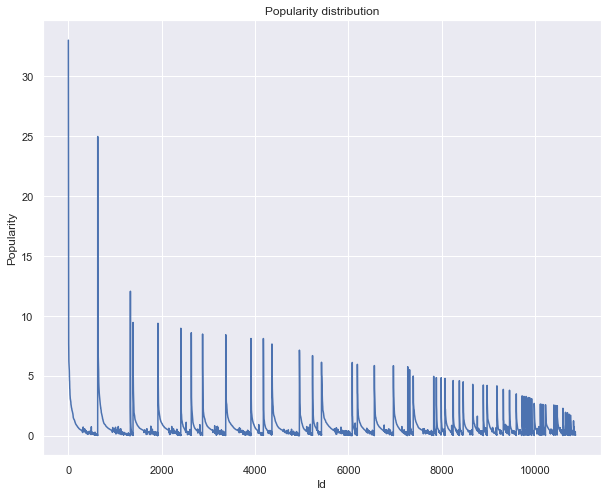

In [81]:
# To undertand a little more and have a visual look, plot popularity
df.popularity.plot(figsize=(10,8))
plt.title("Popularity distribution")
plt.xlabel('Id')
plt.ylabel('Popularity');

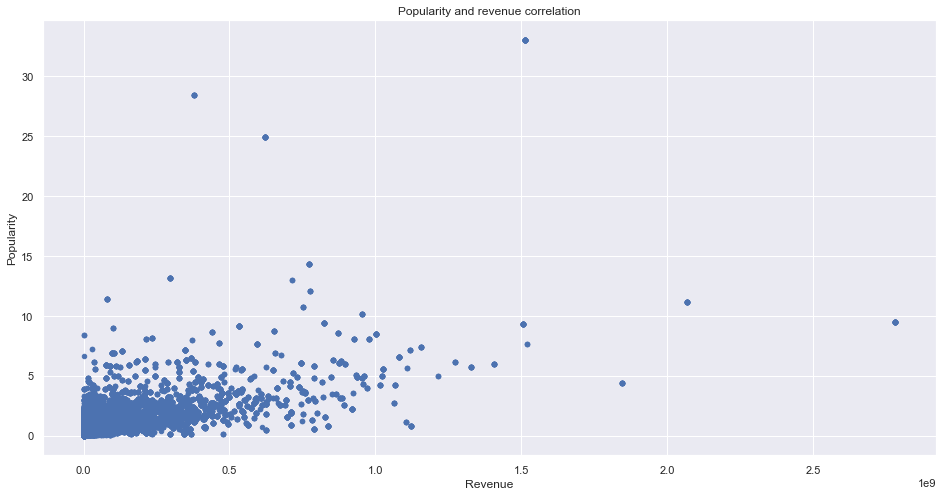

In [36]:
# To visually check if there is any correlation, let's plot revenue and popularity together using the scatter plot
df.plot(x='revenue', y='popularity', kind= 'scatter', figsize=(16,8), c='b')
plt.title("Popularity and revenue correlation");
plt.xlabel('Revenue')
plt.ylabel('Popularity');

In [37]:
# We can see that there is a correlation between the two. To be more precise, let's calculate the correlation between revenue and popularity.
df['revenue'].corr(df['popularity'])

0.6597363249451128

As visually perceived with the scatter chart, we can confirm the strong correlation between revenue and popularity.The **correlation coefficient is 0.6597**.

### 6. Which genres had the highest revenue?

In [38]:
# Check the genres quantity using 'value_counts()' function
df.genres.value_counts()

Drama              11108
Comedy              7852
Thriller            7352
Action              5866
Romance             3792
Horror              3637
Adventure           3489
Crime               3474
Science Fiction     2817
Family              2362
Fantasy             2101
Mystery             2042
Animation           1310
History              884
Music                803
Documentary          788
War                  718
Western              341
Foreign              303
TV Movie             255
Name: genres, dtype: int64

In [39]:
# Group the gernes column to the popularity and add up the popularity for genre
df1 = df.groupby(['genres'])['revenue'].agg('sum')
df1
# sort the serie created in decending order 
df1.sort_values(ascending=False, inplace=True)
df1

genres
Action             554115657871
Adventure          492655243000
Drama              424624050676
Thriller           393052417453
Comedy             374755543105
Fantasy            277883908164
Science Fiction    273686529609
Family             224035996032
Crime              180076680925
Romance            169848747646
Animation          119061293998
Mystery            103600479991
Horror              82742708395
War                 44829522148
History             37754363947
Music               30456110757
Western             13913956911
Documentary          2269353130
Foreign               609881887
TV Movie              126000000
Name: revenue, dtype: int64

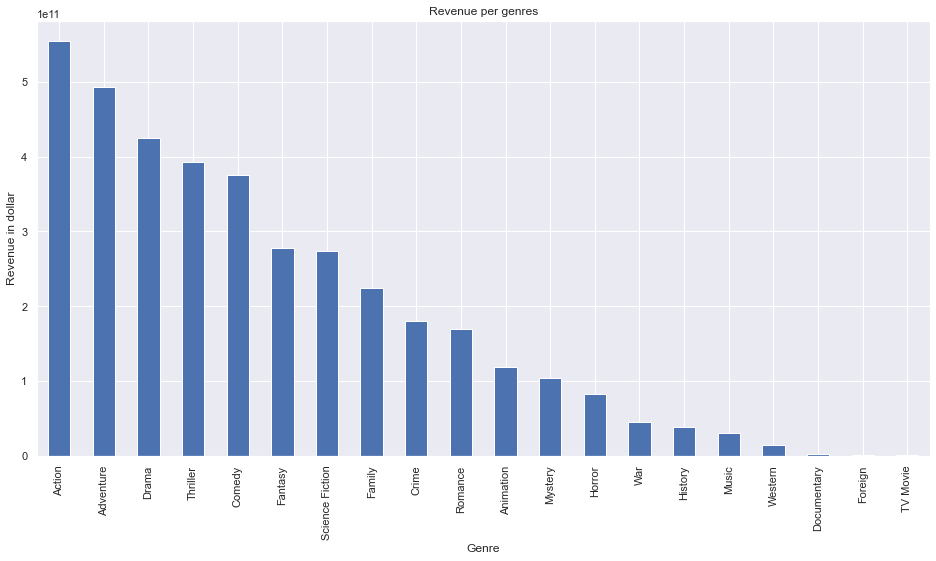

In [40]:
# Let`s visualize the results found by ploting a bar chart
df1.plot(kind='bar',figsize=(16,8))
plt.title("Revenue per genres")
plt.xlabel('Genre')
plt.ylabel('Revenue in dollar');

The genre with the **highest revenue is Action**. Next with the highest revenue are **Adventure**, **Drama** and **Thriller films**

### 7. What is the correlation between popularity, budget, revenue and vote?

In [41]:
# To calculate the correlation between popularity, budget, revenue and vote average use 'corr()' function
colist=list(['popularity','budget','revenue','vote_average'])

colist = df[colist].corr()
colist

,popularity,budget,revenue,vote_average
popularity,1.000000,0.523516,0.659736,0.258942
budget,0.523516,1.000000,0.734098,0.112175
revenue,0.659736,0.734098,1.000000,0.220517
vote_average,0.258942,0.112175,0.220517,1.000000


Text(0.5, 1.0, 'Correlations')

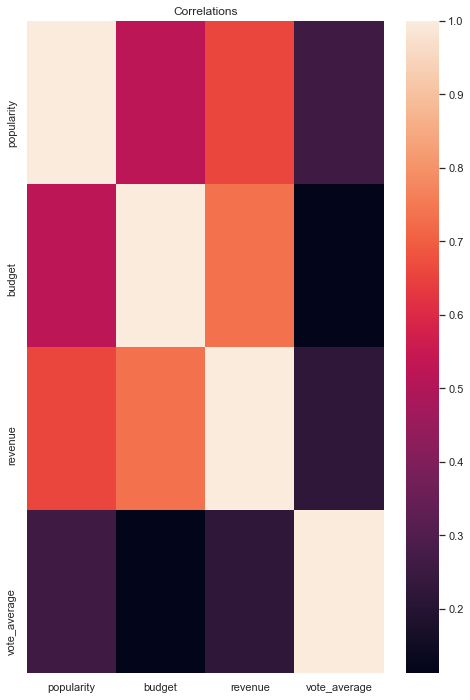

In [42]:
# To visualise the corrrelation plot a heatmap using seaborn library
sns.heatmap(colist)
plt.title("Correlations")

We can note that there is a positive correlation between all of them, but the **average** vote has a very low correlation, **less than 0.26** in relation to the others.
**Popularity**, **revenue** and **budget** have a **correlation above 0.5**, indicating a strong correlation between them.

### 8. Was the movie with the biggest budget more profitable?

In [43]:
#use the 'prof' formula created before and locate the movie with the highest profit
df.loc[prof.idxmax()]

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Action,Ingenious Film Partners,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Action,Twentieth Century Fox Film Corporation,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Action,Dune Entertainment,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Action,Lightstorm Entertainment,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Adventure,Ingenious Film Partners,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Adventure,Twentieth Century Fox Film Corporation,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Adventure,Dune Entertainment,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Adventure,Lightstorm Entertainment,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Fantasy,Ingenious Film Partners,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Fantasy,Twentieth Century Fox Film Corporation,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09


In [44]:
# Find the movie with the highest budget
df.nlargest(1, 'budget')

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,46528,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,assassin|small town|revenge|deception|super speed,100,Adventure,Boram Entertainment Inc.,12/2/10,74,6.4,2010,425000000.0,11087569.0


The movie with the bigger budget is The Warrior's Way and the highest profit is Avatar.
We can conclude that **not necessarily** the movie with the **highest budget will be the most profitable one**.

### 9. Which was the most profitable production company?

In [45]:
# Use 'value_counts()' function to have a quick look in which companies made more movies
df.production_companies.value_counts()

Warner Bros.                              1418
Universal Pictures                        1374
Paramount Pictures                        1146
Twentieth Century Fox Film Corporation     816
Columbia Pictures                          746
                                          ... 
Oceanic Preservation Society                 1
Vortex/Henkel/Hooper                         1
Velvet Morning                               1
Traverse Media                               1
KinÃ©tique Inc.                              1
Name: production_companies, Length: 7879, dtype: int64

In [46]:
# Group the production companies column to the revenue and add up the revenue for each production companies
dfsum = df.groupby(['production_companies'])['revenue'].agg('sum')
dfsum

production_companies
"DIA" Productions GmbH & Co. KG      88701852
# Lexyn Productions                         0
10 West Studios                             0
100 Feet Productions                        0
1019 Entertainment                    8404524
                                      ...    
uFilm                               400317765
uFund                                       0
verture Films                               0
Ã–sterreichischer Rundfunk (ORF)        11294
í”„ë¡œë•ì…˜M                                0
Name: revenue, Length: 7879, dtype: int64

In [47]:
# sort the serie created in decending order 
dfsum.sort_values(ascending=False, inplace=True)
dfsum

production_companies
Warner Bros.                              169860291536
Universal Pictures                        133344375673
Paramount Pictures                        120103924356
Twentieth Century Fox Film Corporation    118042413207
Walt Disney Pictures                      110747089965
                                              ...     
Manigolda Film                                       0
CKRush Entertainment                                 0
CML Films                                            0
Mangrove Media                                       0
í”„ë¡œë•ì…˜M                                         0
Name: revenue, Length: 7879, dtype: int64

In [48]:
# select the fist row that contain the company with the highest profitability
dfsum.head(1)

production_companies
Warner Bros.    169860291536
Name: revenue, dtype: int64

**Warner Bros** earned over **169B** dollars, making it the most profitable production company.

### 10. Which are the 3 most voted movies?

In [49]:
# Group the original title column to the vote count and add up the vote count for each movie
dfvo = df.groupby(['original_title'])['vote_count'].agg('sum')
dfvo

original_title
$5 a Day                                 24
$9.99                                    36
'71                                    5480
(500) Days of Summer                  16002
(T)Raumschiff Surprise - Periode 1      160
                                      ...  
ì•„ê¸°ì™€ ë‚˜                            11
ì‹ ì˜ í•œ ìˆ˜                            60
í¬í™” ì†ìœ¼ë¡œ                           84
í˜•ì‚¬ Duelist                           10
í•˜ìš¸ë§                                 54
Name: vote_count, Length: 10571, dtype: int64

In [50]:
# sort the serie created in decending order 
dfvo.sort_values(ascending=False, inplace=True)
dfvo

original_title
Inception                                 146505
Avatar                                    135328
The Dark Knight                           134912
Jurassic World                            111240
The Dark Knight Rises                     107568
                                           ...  
Cesar Chavez                                  10
A Perfect Ending                              10
Cheech & Chong's The Corsican Brothers        10
Li Xiao Long                                  10
Peep World                                    10
Name: vote_count, Length: 10571, dtype: int64

In [51]:
# Select the 3 firt rowls to selec the 3 movies with the highest votes
dfvo.head(3)

original_title
Inception          146505
Avatar             135328
The Dark Knight    134912
Name: vote_count, dtype: int64

The 3 most voted movies was **Inception** with 146505 votes, followed by **Avatar** with 135328 votes and **Dark Night** with 134912 votes.

### 11. What is the most popular genre?

In [52]:
# Group the gernes column to the popularity and add up the popularity for genre
dfpo = df.groupby(['genres'])['popularity'].agg('sum')
dfpo

genres
Action             6614.989556
Adventure          4834.766793
Animation          1245.697306
Comedy             5420.206475
Crime              3008.708838
Documentary         163.606694
Drama              7896.548341
Family             2207.165867
Fantasy            2640.966631
Foreign              60.857971
History             597.786653
Horror             1980.933011
Music               460.902895
Mystery            1704.410380
Romance            2551.847499
Science Fiction    3596.007916
TV Movie             69.114646
Thriller           6559.600809
War                 627.770964
Western             261.093503
Name: popularity, dtype: float64

In [53]:
# sort the serie created in decending order 
dfpo.sort_values(ascending=False, inplace=True)
dfpo

genres
Drama              7896.548341
Action             6614.989556
Thriller           6559.600809
Comedy             5420.206475
Adventure          4834.766793
Science Fiction    3596.007916
Crime              3008.708838
Fantasy            2640.966631
Romance            2551.847499
Family             2207.165867
Horror             1980.933011
Mystery            1704.410380
Animation          1245.697306
War                 627.770964
History             597.786653
Music               460.902895
Western             261.093503
Documentary         163.606694
TV Movie             69.114646
Foreign              60.857971
Name: popularity, dtype: float64

In [54]:
# Select the firt rowl to selec the most popular genre
dfpo.head(1)

genres
Drama    7896.548341
Name: popularity, dtype: float64

With 7896.548341 points, **Drama** is the most popular genre.

### 12. Which genre had the highest release per year?

In [55]:
# Group the genres column to the resease_year and count the release per year for each genre
dfre = df.groupby(['genres'])['release_year'].agg('value_counts')
dfre

genres   release_year
Action   2014            380
         2011            347
         2013            339
         2009            295
         2008            290
                        ... 
Western  1968              1
         1977              1
         1978              1
         2002              1
         2006              1
Name: release_year, Length: 1049, dtype: int64

In [56]:
# sort the serie created in decending order 
dfre.sort_values(ascending=False, inplace=True)
dfre

genres     release_year
Drama      2014            759
           2013            659
           2015            653
           2009            606
           2008            595
                          ... 
Animation  1961              1
Music      1973              1
           1962              1
Animation  1963              1
Western    2006              1
Name: release_year, Length: 1049, dtype: int64

In [57]:
# Select the firt rowl to selec the genre with the highest release per year
dfre.head(1)

genres  release_year
Drama   2014            759
Name: release_year, dtype: int64

The genre with the highest released per year was **drama** with **759 movies released**. The **year** that had the highest number of film releases was **2014**.

### 13. Which director has made the most movies?

In [58]:
# Group the director column to the original_title and count the original title per year for each director
dfdi = df.groupby(['director'])['original_title'].agg('count')
dfdi

director
0                            98
 FrÃ©dÃ©ric Jardin           20
A. Todd Smith                 9
A.R. Murugadoss               5
Aaron Aites                   1
                             ..
Ã‡aÄŸan Irmak                 2
Ã‰mile Gaudreault             2
Ã‰ric Besnard                 1
Ã‰tienne Chatiliez           11
Ã€lex Pastor|David Pastor    20
Name: original_title, Length: 5068, dtype: int64

In [59]:
# sort the serie created in decending order 
dfdi.sort_values(ascending=False, inplace=True)
dfdi

director
Ridley Scott              250
Clint Eastwood            245
Steven Spielberg          241
Woody Allen               182
Steven Soderbergh         178
                         ... 
Richard Press               1
Jonathan Lisecki            1
Bruce Gowers                1
Geeta Patel|Ravi Patel      1
Ron Daniels                 1
Name: original_title, Length: 5068, dtype: int64

In [60]:
# Select the firt rowl to selec the director who made the most movies
dfdi.head(1)

director
Ridley Scott    250
Name: original_title, dtype: int64

**Ridley Scott** was the director who made the most movies. He made the total of **250 movies**.

### 14. What is the relationship between runtime and popularity?

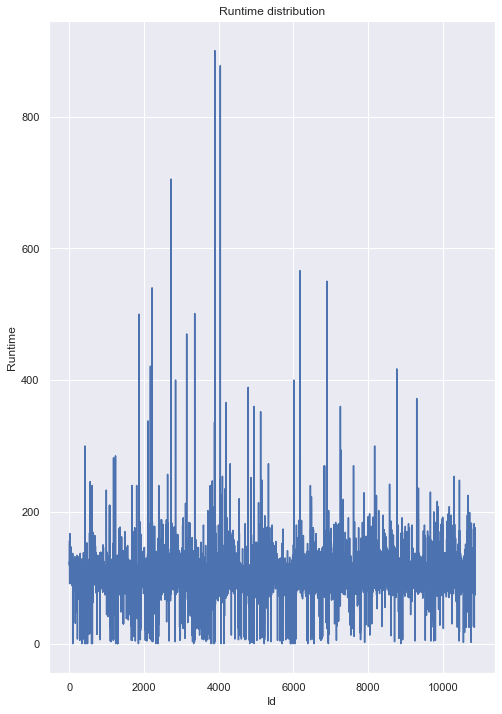

In [61]:
# Let's take a quick visual graph look of runtime distribution
df.runtime.plot()
plt.title("Runtime distribution")
plt.xlabel('Id')
plt.ylabel('Runtime');

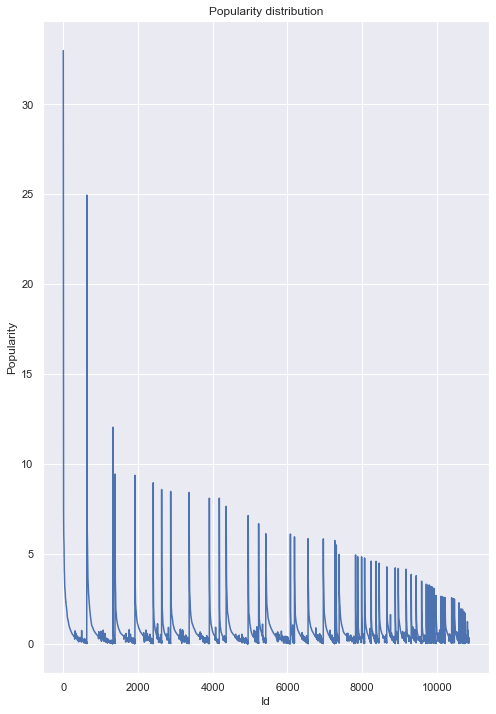

In [62]:
# Plot popularity to compare with runtime
df.popularity.plot()
plt.title("Popularity distribution")
plt.xlabel('Id')
plt.ylabel('Popularity');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


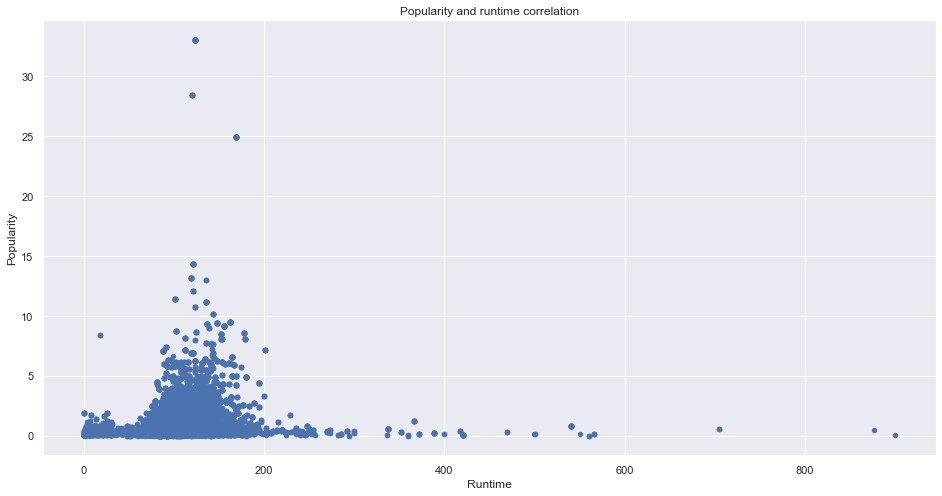

In [63]:
# To analyse better the relationship betwen runtime and popularity, plot a scatter graph to see if there is any corralation
df.plot(x='runtime', y='popularity', kind= 'scatter',  figsize=(16,8))
plt.title("Popularity and runtime correlation")
plt.xlabel('Runtime')
plt.ylabel('Popularity');

In [64]:
# To calculate the correlation between popularity and runtime use 'corr()' function
rtlist=list(['popularity','runtime'])

rtlist = df[rtlist].corr()
rtlist

,popularity,runtime
popularity,1.000000,0.169128
runtime,0.169128,1.000000


We can see in correlation graph that there is a little or even no correlation, but let's take a closer look where is a bigger concentration in runtime.

In [65]:
# Filter the runtime using 'query' function and selec the range with highest concentration
rtfil = df.query('runtime > 70 & runtime < 200')
rtfil

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Amblin Entertainment,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Legendary Pictures,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Fuji Television Network,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Dentsu,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10863,39768,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,car|trolley|stealing car,94,Mystery,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10863,39768,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,car|trolley|stealing car,94,Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,spoof,80,Action,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,spoof,80,Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


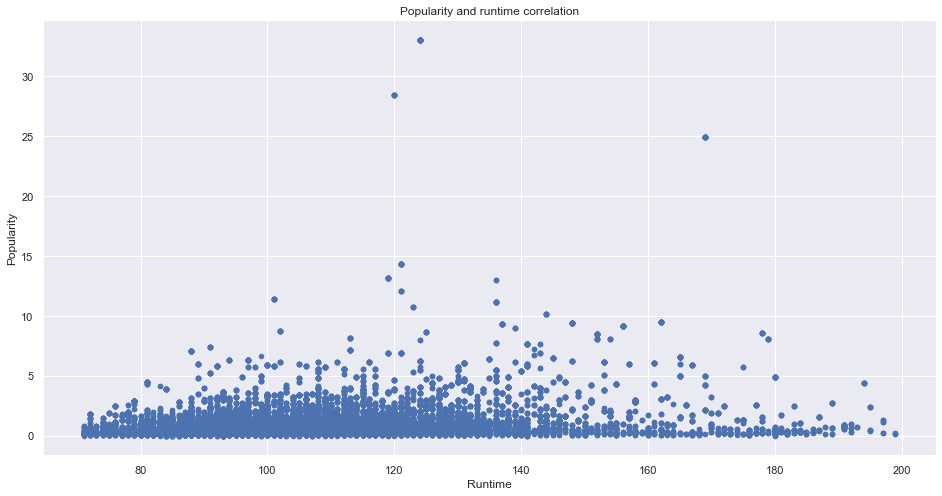

In [66]:
# Plot the filtered dataframe correlation
rtfil.plot(x='runtime', y='popularity', kind= 'scatter', figsize=(16,8))
plt.title("Popularity and runtime correlation")
plt.xlabel('Runtime')
plt.ylabel('Popularity');

We can notice a **bigger concentration** of runtime between **80 untill 160 minutes**, but the **correlation** between runtime and popularity is **very small**. Making the corralation formula the result is a correlation of **0.169**.

### 15. What is the average runtime evolution per year?

In [67]:
# Group the release_year column to the runtime and average the runtime for each year
dfev = df.groupby(['release_year'])[['runtime']].agg('mean')
dfev

,runtime
release_year,
1960,119.198276
1961,127.237624
1962,132.260870
1963,120.288889
1964,112.250000
1965,122.316176
1966,115.037037
1967,115.288235
1968,119.126437


In [68]:
# sort the serie created in ascending order 
dfev.sort_values('release_year', ascending=True, inplace=True)
dfev

,runtime
release_year,
1960,119.198276
1961,127.237624
1962,132.260870
1963,120.288889
1964,112.250000
1965,122.316176
1966,115.037037
1967,115.288235
1968,119.126437


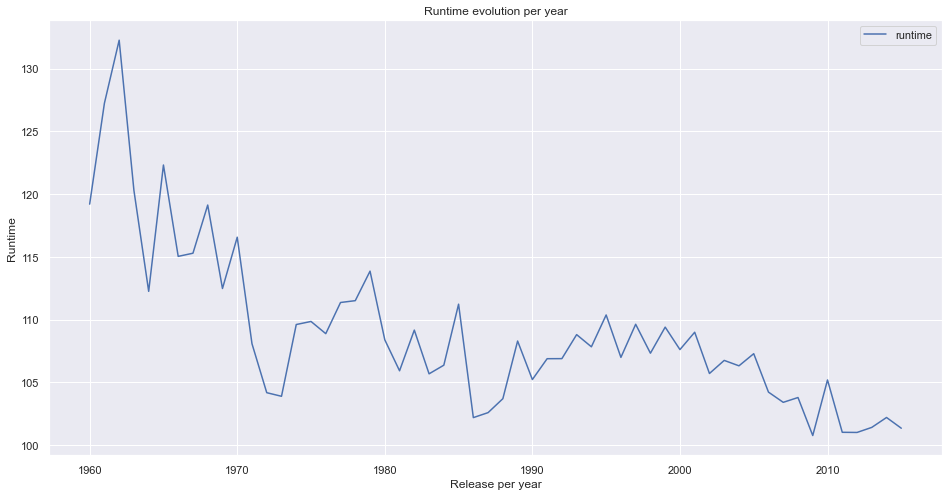

In [69]:
# Plot the average runtime evolution per year
dfev.plot(kind='line', figsize=(16,8))
plt.title("Runtime evolution per year")
plt.xlabel('Release per year')
plt.ylabel('Runtime');

With the visualization of the line graph, we can see that the average runtime of films has **decreased** over the years.

### 16. Does the length of films relate to revenue?

In [70]:
# To calculate the correlation between runtime and revenue use 'corr()' function
corre=list(['runtime','revenue'])

df[corre].corr()

,runtime,revenue
runtime,1.000000,0.208999
revenue,0.208999,1.000000


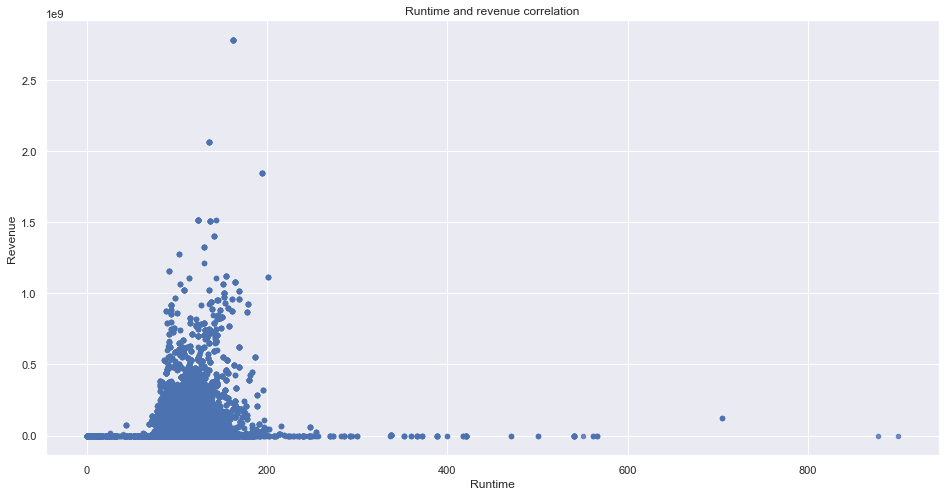

In [71]:
# plot a scatter graph to visualize the correlation between runtime and revenue
df.plot(x='runtime', y='revenue', kind= 'scatter', figsize=(16,8), alpha=0.8, c='b')
plt.title("Runtime and revenue correlation")
plt.xlabel('Runtime')
plt.ylabel('Revenue');

The **corelations coeficient** between runtime and revenue is **0.2089** this means they have low correlation. This result can be verified with the scatter graph.

### 17. Number of movies over the years increased?

In [72]:
# Group the resease_year column to the original_title and count the original_tile for each year
dfmo = df.groupby(['release_year'])['original_title'].agg('count')
dfmo

release_year
1960     116
1961     101
1962     115
1963     135
1964     176
1965     136
1966     189
1967     170
1968     174
1969     130
1970     179
1971     221
1972     147
1973     245
1974     229
1975     229
1976     224
1977     229
1978     303
1979     236
1980     337
1981     343
1982     369
1983     349
1984     566
1985     533
1986     586
1987     625
1988     673
1989     674
1990     675
1991     683
1992     801
1993     918
1994     968
1995     967
1996    1097
1997    1147
1998    1241
1999    1320
2000    1264
2001    1620
2002    1875
2003    1812
2004    2108
2005    2406
2006    2592
2007    2844
2008    3130
2009    3466
2010    2929
2011    3179
2012    3026
2013    3390
2014    3764
2015    3357
Name: original_title, dtype: int64

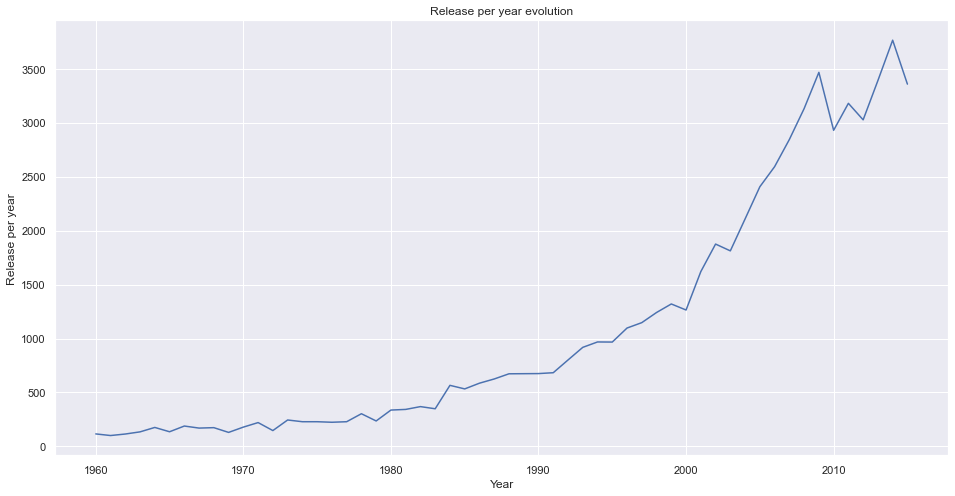

In [73]:
# For a better look in the results found, plot a scatter graph
dfmo.plot(kind='line', figsize=(16,8))
plt.title("Release per year evolution")
plt.xlabel('Year')
plt.ylabel('Release per year');

The data show that in **1960**, **116** films were released per year and in **2015** the number of films released was **3357**. We can see the **significant increase** in new films over the years in the chart above.

<a id='conclusions'></a>
## Conclusions

> Having performed the data analysis, we can draw some conclusions:

>> - The number of releases per year has increased a lot over the years;
>> - Duration time has a low correlation with billing and has decreased over the years;
>> - Drama was the most popular genre and the most release per year;
>> - Action was the genre which had the highest revenue 
>> - Revenue, budget and popularity have a high correlation between them;
>> - Warner Bross is the company that earned the most up to 2015.

### Limitations

> - In the dataset there is a considerable number of Nan values that have been replaced by zero, this may imply the accuracy of the analyses.
> - The currency used in budget and revenue has not been specified, it was deducted that it is in US dollars
> - The execution time of this analysis may suffer a small performance delay because the split function was used to separate genres and production companies to carry out some punctual analyse.
> - In the dataset there is a lot of lines with revenue equal to zero, as we do not know the veracity or the possible lack of data, this analysis may be incomplete.
> - Remembering that correlation does not imply causality.
